# Loading the time-series
In the following cell, the processed (imputated, filtered and resampled) segmented time-series are loaded into the notebook.

In [2]:
'''Reading the segmented data'''
import pickle
import gzip
import shutil
import os

def load_pickle_from_parts(parts_dir):
    # Combine the parts into a single compressed file
    combined_path = os.path.join(parts_dir, 'combined_compressed_pickle.gz')
    with open(combined_path, 'wb') as combined_file:
        part_num = 0
        while True:
            part_path = os.path.join(parts_dir, f'segmented_data_part_{part_num:03d}')
            if not os.path.exists(part_path):
                break
            with open(part_path, 'rb') as part_file:
                shutil.copyfileobj(part_file, combined_file)
            part_num += 1
    
    # Decompress the combined file and load the pickle data
    with gzip.open(combined_path, 'rb') as f_in:
        data = pickle.load(f_in)
    
    # Optionally remove the combined file after loading
    os.remove(combined_path)
    
    return data

# Example usage
current_dir = os.getcwd()  # Use the current working directory
parent_dir = os.path.dirname(current_dir)
parts_dir = os.path.join(parent_dir, 'data')
segmented_data = load_pickle_from_parts(parts_dir)


In [33]:
print("The list of users:", sorted(list(segmented_data.keys())))
print("The list of activities for user 'sensei-415':", list(segmented_data['sensei-415'].keys()))
print("The list of devices for user 'sensei-415', and activity '0':", list(segmented_data['sensei-415'][0].keys()))
print("The list of modalities for user 'sensei-415', activity '0', and device 'corsano_wrist':", list(segmented_data['sensei-415'][0]['corsano_wrist'].keys()))
print("The acc_x modality for user 'sensei-415', activity '0', and device 'corsano_wrist':\n" + str(segmented_data['sensei-415'][0]['corsano_wrist']['acc_x']))

The list of users: ['sensei-103', 'sensei-178', 'sensei-188', 'sensei-201', 'sensei-223', 'sensei-237', 'sensei-318', 'sensei-359', 'sensei-415', 'sensei-460', 'sensei-489', 'sensei-616', 'sensei-642', 'sensei-661', 'sensei-715', 'sensei-862', 'sensei-879', 'sensei-904', 'sensei-972', 'sensei-997']
The list of activities for user 'sensei-415': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
The list of devices for user 'sensei-415', and activity '0': ['corsano_wrist', 'cosinuss_ear', 'sensomative_bottom', 'sensomative_back', 'vivalink_patch', 'zurichmove_wheel']
The list of modalities for user 'sensei-415', activity '0', and device 'corsano_wrist': ['acc_x', 'acc_y', 'acc_z']
The acc_x modality for user 'sensei-415', activity '0', and device 'corsano_wrist':
time
1.671553e+09    160.312204
1.671553e+09    161.986823
1.671553e+09    163.112680
1.671553e+09    163.413752
1.671553e+09    162.675652
                   ...    
1.671553e+09    364.085409
1.671553e+09    364.250687
1.671553e+09    364

In [22]:
"""
Libraries
"""

import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt, medfilt


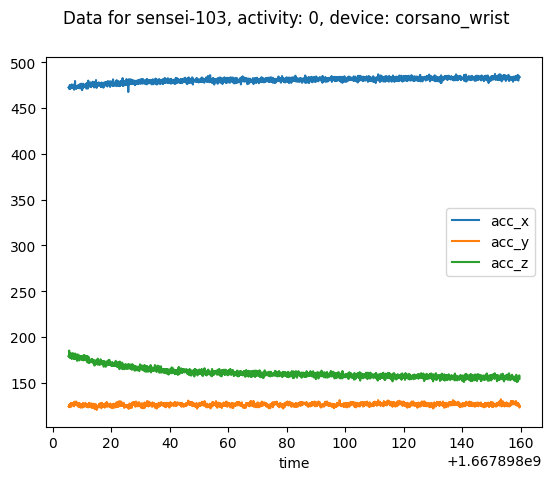

In [38]:
'''Checking the adls'''

subject = 'sensei-103'
adl = 0
device = 'corsano_wrist'

signal = segmented_data[subject][adl][device]
signal.plot()
# Get the current figure
fig = plt.gcf()
# Set the title of the figure
fig.suptitle(f'Data for {subject}, activity: {adl}, device: {device}', fontsize=12)
# Show the plot
plt.show()